In [4]:
import pandas as pd
data = pd.read_csv('/Users/colincampbell/Desktop/data/C60plus.csv', index_col = 'wavenumber')

In [5]:
data

,abs,Unnamed: 2,Unnamed: 3
wavenumber,,,
10697.55723,0.97885,62.50760,59.296311
10697.52423,1.01612,61.61312,58.870519
10697.48723,0.97103,62.69528,59.385263
10697.45523,0.98589,62.33864,59.216117
10697.41823,0.99681,62.07656,59.091510
10697.40023,0.97800,62.52800,59.305986
10697.28623,1.02361,61.43336,58.784577
10697.18923,0.98529,62.35304,59.222956
10697.15723,0.99933,62.01608,59.062717


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = np.loadtxt('C60plus.csv',skiprows=1, delimiter=',')

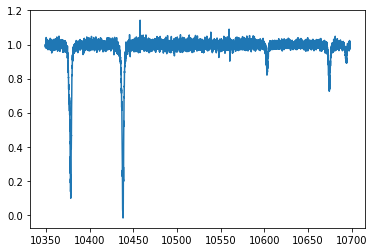

In [8]:
plt.plot(data[:,0],data[:,1])

In [9]:
data_min = min(data[:,0][14:-12])
data_max =max(data[:,0][14:-12])
print(data_max-data_min)

346.99509000000035


In [10]:
bin_edges= unique(data[:,0][14:-13].astype('int'))

In [11]:
wavenum = data[:,0][14:-13].astype('int')
absorption = data[:,1][14:-13]

In [12]:
assignment = np.digitize(wavenum,bin_edges)

In [13]:
unique, counts = numpy.unique(assignment, return_counts=True)

In [14]:
counter = 0
checker = assignment[0]
average = 0
running_average_list = []
for i in range(len(assignment)-1):
    a = assignment[i]
    if a == checker:
        average = average + absorption[i]
        counter = counter +1
        
    else:
        avg = np.array([wavenum[i], average/float(counter)])
        running_average_list.append(avg)
        counter = 1
        average = 0
        checker = a

In [15]:
avg_absorbs = np.array(running_average_list)

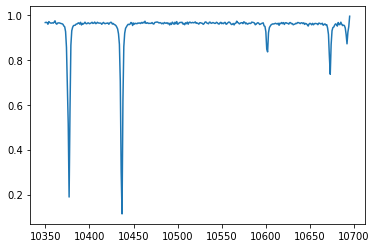

In [41]:
plot(avg_absorbs[:,0], (avg_absorbs[:,1]))

In [17]:
np.savetxt('smoothed_abs.csv', avg_absorbs, delimiter=',')

In [21]:
np.median(avg_absorbs[:,1])

0.9623683333333333

In [22]:
min(avg_absorbs[:,1])

0.11357517241379309

In [44]:
ave_abs = avg_absorbs[:,1] 

scaled_abs = []
for i in ave_abs:
    scaled_abs.append((i * 33) + 48)
    
new_avg_abs = [avg_absorbs[:,0], scaled_abs]    

In [45]:
new_avg_abs

[array([10695., 10694., 10693., 10692., 10691., 10690., 10689., 10688.,
        10687., 10686., 10685., 10684., 10683., 10682., 10681., 10680.,
        10679., 10678., 10677., 10676., 10675., 10674., 10673., 10672.,
        10671., 10670., 10669., 10668., 10667., 10666., 10665., 10664.,
        10663., 10662., 10661., 10660., 10659., 10658., 10657., 10656.,
        10655., 10654., 10653., 10652., 10651., 10650., 10649., 10648.,
        10647., 10646., 10645., 10644., 10643., 10642., 10641., 10640.,
        10639., 10638., 10637., 10636., 10635., 10634., 10633., 10632.,
        10631., 10630., 10629., 10628., 10627., 10626., 10625., 10624.,
        10623., 10622., 10621., 10620., 10619., 10618., 10617., 10616.,
        10615., 10614., 10613., 10612., 10611., 10610., 10609., 10608.,
        10607., 10606., 10605., 10604., 10603., 10602., 10601., 10600.,
        10599., 10598., 10597., 10596., 10595., 10594., 10593., 10592.,
        10591., 10590., 10589., 10588., 10587., 10586., 10585., 

In [19]:
from midiutil import MIDIFile


In [29]:
min(scaled_abs)
bin_notes = [48,50,52,55,57,60,62,64,67,69,72,74,76,79,81]

In [46]:
np.histogram(new_avg_abs, bin_notes)

(array([  0,   1,   1,   0,   1,   0,   0,   2,   1,   2,   1,   3,  17,
        317]),
 array([48, 50, 52, 55, 57, 60, 62, 64, 67, 69, 72, 74, 76, 79, 81]))

In [32]:
print(scaled_abs)

[80.81440555555555, 79.28827730769231, 78.4699388888889, 76.75698913043479, 78.13314333333332, 79.09711, 79.44771807692308, 79.50566222222221, 79.443522, 79.6377325, 79.93965310344828, 79.59684, 79.58214230769231, 79.88958535714286, 79.367325, 79.61441555555555, 79.6908192857143, 79.51029115384614, 79.23187269230769, 79.14919499999999, 78.67746, 76.62905571428571, 72.28548692307692, 74.9391588888889, 78.12925666666666, 79.07528217391304, 79.57581428571427, 79.52619461538461, 79.69189269230769, 79.58522888888889, 79.49685, 79.78426777777777, 79.6978073076923, 79.68217038461539, 79.78621111111111, 79.79543888888888, 79.57605000000001, 79.72491535714286, 79.72533692307692, 79.76257333333334, 79.70911615384615, 79.55826807692307, 79.77286444444444, 79.55169346153845, 79.69962888888888, 79.77184153846153, 79.67417785714287, 79.37285608695652, 79.55683928571429, 79.70684, 79.75285666666667, 79.61276884615384, 79.8521011111111, 79.73068038461538, 79.8495711111111, 79.84847111111111, 79.72851,

In [20]:
for abs in data.range(1.14,1)
abs=1

SyntaxError: invalid syntax (<ipython-input-20-e5025bae7f2f>, line 1)